In [1]:
import numpy as np

from Memory.MemoryEncoder import MemoryEncoder
from Memory.MemoryDecoder import MemoryDecoder
import torch
import matplotlib.pyplot as plt

In [2]:
m = MemoryEncoder()
de = MemoryDecoder(m.ann_input_size((3, 100, 100)), m.cnn_output_size((3, 100, 100)))

In [3]:
# image = torch.rand((1, 3, 100, 100))
image = torch.randint(0, 255, (1, 3, 100, 100))
encoded = m.encode_image(image.type(torch.float))
print(encoded)

tensor([[-0.5289, -0.0710,  0.2302,  0.3131,  0.2489]],
       grad_fn=<AddmmBackward0>)


In [4]:
image[0, :, 0, 0]

tensor([115,  42, 115])

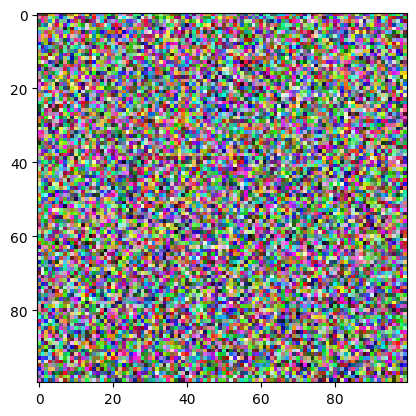

In [5]:
plt.imshow(np.stack(*image, axis=-1))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


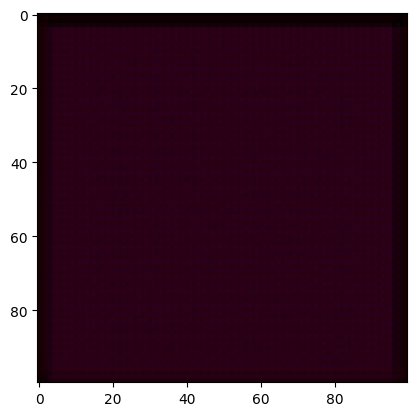

In [6]:
plt.imshow(np.stack(*de.decode_image(encoded).detach().numpy(), axis=-1))

In [12]:
from Memory.Memory import Memory

In [9]:
# memo = Memory(_size=(3, 480, 640))
# ALOT OF RAM WILL BE USED!!


In [ ]:
import cv2 as cv


cap = cv.VideoCapture(0)
flag = True
if not cap.isOpened():
    flag = False
    print("NO")

last_frame = None
i = 0
max_i = 10
while flag:
    ret, frame = cap.read()
    if not ret:
        print("No frame")
        break
        
    frame = cv.flip(frame, 1)
    
    memo.perceive_image(torch.FloatTensor(memo.unstack(frame)))
    if i == max_i:
        i = 0

        
        # memo.train_vision(plot_flag=True)
        
        x = memo.encoder.encode_image(torch.FloatTensor(memo.unstack(frame)))
        recon_frame = memo.decoder.decode_image(x).detach().numpy()
        print(frame.shape)
        print(recon_frame.shape)
        
        fig, ax = plt.subplots(1, 2)
        
        ax[0].imshow(frame)
        ax[1].imshow(np.stack(*recon_frame, axis=-1))
        plt.show()
        
        print("MAXI")
    print(i)
    
    cv.imshow('frame', frame)
    if cv.waitKey(1) == ord('q'):
        break
    i += 1

cap.release()
cv.destroyAllWindows()
    
    

In [ ]:
cv.imshow('k', last_frame)
cv.waitKey(0)  
cv.destroyAllWindows()


In [ ]:
plt.imshow(255 - 179 * np.ones((480, 640, 3)).astype(int))

In [ ]:
A = torch.randn((1, 3, 2, 2))
A

In [ ]:
A_rgb = np.stack(*A, axis=-1)
A_rgb

In [ ]:

def unstack(img):
    s = img.shape[-1]
    return np.array([img[:, :, i] for i in range(s)])



In [1]:
from Memory.KnowledgeGraph import KnowledgeGraph
from Memory.Node import Node
from Memory.Edge import Edge

In [2]:
graph = KnowledgeGraph()

In [3]:
graph.add_node(Node(id="000000", label='cat', type='image', attributes={'encoding': [0]*5}))
graph.add_node(Node(id="000001", label='dog', type='image', attributes={'encoding': [0.2]*5}))


In [4]:
graph.add_edge(Edge(graph.get_node("000000"), graph.get_node("000001")))

In [5]:
print(graph.nodes)
print(graph.edges)

{'000000': MemoryNode(ID: 000000, Label: cat), '000001': MemoryNode(ID: 000001, Label: dog)}
[Edge(source: MemoryNode(ID: 000000, Label: cat), target: MemoryNode(ID: 000001, Label: dog))]


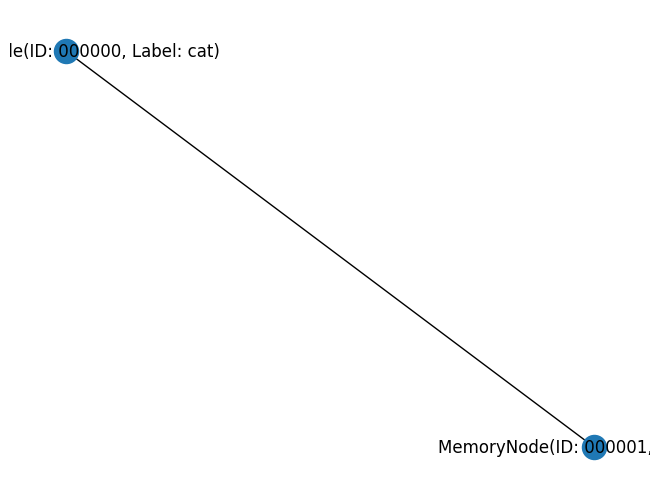

In [6]:
graph.visualize()

In [7]:
graph.d3js_json()

{'nodes': [{'id': '000000',
   'label': 'cat',
   'type': 'image',
   'attributes': {'encoding': [0, 0, 0, 0, 0]}},
  {'id': '000001',
   'label': 'dog',
   'type': 'image',
   'attributes': {'encoding': [0.2, 0.2, 0.2, 0.2, 0.2]}}],
 'links': [{'source': '000000',
   'target': '000001',
   'label': None,
   'attributes': {}}]}